# CS336 Assignments

| # | Topic                         | Description                                 |
|---|-------------------------------|---------------------------------------------|
| 1 | Basics                        | Train an LLM from scratch                   |
| 2 | Systems                       | Make it run fast!                           |
| 3 | Scaling                       | Make it performant at a FLOP budget         |
| 4 | Data                          | Prepare the right datasets                  |
| 5 | Alignment & Reasoning RL      | Align it to real-world use cases            |

### Assignment #1
- Implement all of the components (tokenizer, model, loss function, optimizer) necessary to train a standard Transformer language model
- Train a minimal language model

In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
import lovely_tensors as lt
lt.monkey_patch()

import tiktoken

from datasets import load_dataset
import joblib

from torch.utils.data import TensorDataset, DataLoader


In [2]:
from string import ascii_letters

{l: ord(l) for l in ascii_letters}

{'a': 97,
 'b': 98,
 'c': 99,
 'd': 100,
 'e': 101,
 'f': 102,
 'g': 103,
 'h': 104,
 'i': 105,
 'j': 106,
 'k': 107,
 'l': 108,
 'm': 109,
 'n': 110,
 'o': 111,
 'p': 112,
 'q': 113,
 'r': 114,
 's': 115,
 't': 116,
 'u': 117,
 'v': 118,
 'w': 119,
 'x': 120,
 'y': 121,
 'z': 122,
 'A': 65,
 'B': 66,
 'C': 67,
 'D': 68,
 'E': 69,
 'F': 70,
 'G': 71,
 'H': 72,
 'I': 73,
 'J': 74,
 'K': 75,
 'L': 76,
 'M': 77,
 'N': 78,
 'O': 79,
 'P': 80,
 'Q': 81,
 'R': 82,
 'S': 83,
 'T': 84,
 'U': 85,
 'V': 86,
 'W': 87,
 'X': 88,
 'Y': 89,
 'Z': 90}

In [3]:
chr(115)

's'

### Exercise 1: Problem (unicode1): Understanding Unicode (1 point)


In [4]:
chr(0)

'\x00'

This represents a null character often used to represent end of a string. It is also called an escape sequence.

In [5]:
repr('\x00')

"'\\x00'"

The string representation of this character is '\x00'. When this string is passed to print function, it's rendered as null as that is the purpose of this character.

In [6]:
chr(0)

'\x00'

In [7]:
print(chr(0))

 


In [8]:
"this is a test" + chr(0) + "string"

'this is a test\x00string'

In [9]:
print("this is a test" + chr(0) + "string")

this is a test string


When we print the character with the print function, the character is executed and hence renders nothing on the stdout.

### Exercise 2: Problem (unicode2): Unicode Encodings (3 points)

In [10]:
test_string = "Hello"
test_string_encoded = test_string.encode("UTF-8")
print(f"test_string_encoded: {test_string_encoded}")
print(f"Byte values: {list(test_string_encoded)}")
print(f"test string decoded: {test_string_encoded.decode("UTF-8")}")

test_string_encoded: b'Hello'
Byte values: [72, 101, 108, 108, 111]
test string decoded: Hello


(a) What are some reasons to prefer training our tokenizer on UTF-8 encoded bytes, rather than
UTF-16 or UTF-32? It may be helpful to compare the output of these encodings for various
input strings

A: Majority of the internet comprises of UTF-8 characters. And, UTF-8 is space efficient as 5 characters in UTF-8 takes 5 bytes whereas UTF-16 and UTF-32 takes 2x and 4x the bytes.

In [11]:
def decode_utf8_bytes_to_str_wrong(bytestring: bytes):
    return "".join([bytes([b]).decode("utf-8") for b in bytestring])

decode_utf8_bytes_to_str_wrong("hello".encode("utf-8"))

'hello'

In [12]:
decode_utf8_bytes_to_str_wrong("café".encode("utf-8"))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 0: unexpected end of data

The function attempts to convert each character as a standalone single character. 

In [13]:
"café".encode("UTF-8")

b'caf\xc3\xa9'

## Exercise 3: Problem (train_bpe): BPE Tokenizer Training (15 points)

In [14]:
def train_bpe(input_path, vocab_size=1000, special_tokens=[]):
    vocab, merges = None, None

    return vocab, merges



## Exercise 4: Problem (train_bpe_tinystories): BPE Training on TinyStories (2 points)

In [15]:
def train_bpe_tinystories(input_path, vocab_size=10000, special_tokens=["|endoftext|"]):
    vocab, merges = None, None

    return vocab, merges

## Exercise 5: Problem (train_bpe_expts_owt): BPE Training on OpenWebText (2 points)

In [16]:
def train_bpe_expts_owt(input_path, vocab_size=32000, special_tokens=["|endoftext|"]):
    vocab, merges = None, None

    return vocab, merges

## Exercise 6: Problem (tokenizer): Implementing the tokenizer (15 points)

In [17]:
class BPETokkenizer():
    def __init__(self, vocab, merges, special_tokens=None):
        pass

    def encode(self, text:str):
        pass

    def decode(self, ids:list[str]):
        pass

    def from_files():
        pass

## Exercise 7: Problem (tokenizer_experiments): Experiments with tokenizers (4 points)

a. Sample 10 documents from TinyStories and OpenWebText. Using your previously-trained TinyStories and OpenWebText tokenizers (10K and 32K vocabulary size, respectively), encode these sampled documents into integer IDs. What is each tokenizer’s compression ratio (bytes/token)?


b. What happens if you tokenize your OpenWebText sample with the TinyStories tokenizer? Compare the compression ratio and/or qualitatively describe what happens

## Exercise 8: Problem (linear): Implementing the linear module (1 point)

In [18]:
import torch
from math import sqrt
from einops import einsum

class MyLinear(torch.nn.Module):
    def __init__(self, in_features, out_features, device=None, dtype=None):
        super().__init__()
        self.device = device
        self.dtype = dtype
        weight = torch.empty(in_features, out_features)
        sigma = sqrt(2 / (in_features + out_features))
        torch.nn.init.trunc_normal_(weight, mean=0, std=sigma, a=-3 * sigma, b=3 * sigma)

        self.W = torch.nn.Parameter(weight)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        # output = x @ self.W 

        # einsum way
        output = einsum(x, self.W, "... j, j k-> ... k")

        return output
    
torch.manual_seed(42)
model = MyLinear(5, 2)

batch = torch.randn(3, 5)

output = model(batch)
output.v

tensor[3, 2] n=6 x∈[-1.725, 0.063] μ=-0.740 σ=0.702 grad ViewBackward0 [[-1.281, -1.725], [-0.531, -0.048], [0.063, -0.920]]
tensor([[-1.2815, -1.7247],
        [-0.5314, -0.0480],
        [ 0.0631, -0.9196]], grad_fn=<ViewBackward0>)

## Exercise 9: Problem (embedding): Implement the embedding module (1 point)

In [19]:
import torch
from math import sqrt
from einops import einsum

class MyEmbedding(torch.nn.Module):
    def __init__(self, num_embeddings, embedding_dim, device=None, dtype=None):
        super().__init__()
        self.device = device
        self.dtype = dtype

        weight = torch.empty(num_embeddings, embedding_dim)
        torch.nn.init.trunc_normal_(weight, mean=0, std=1, a=-3, b=3)

        self.W = torch.nn.Parameter(weight)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        output = self.W[x]

        return output
    
torch.manual_seed(42)
model = MyEmbedding(10, 5)

batch = torch.randint(0, 10, (4, ))

print(batch.v)
output = model(batch)
output.v

tensor[4] i64 x∈[0, 9] μ=4.500 σ=5.196 [0, 9, 0, 9]
tensor([0, 9, 0, 9])


tensor[4, 5] n=20 x∈[-0.856, 1.729] μ=0.398 σ=0.862 grad IndexBackward0
tensor([[ 1.1812,  1.3651, -0.2971,  1.7287, -0.2774],
        [-0.5769,  0.7990,  0.2255,  0.6847, -0.8557],
        [ 1.1812,  1.3651, -0.2971,  1.7287, -0.2774],
        [-0.5769,  0.7990,  0.2255,  0.6847, -0.8557]],
       grad_fn=<IndexBackward0>)

In [21]:
class MyEmbedding(torch.nn.Module):
    def __init__(self, num_embeddings, embedding_dim, device=None, dtype=None):
        super().__init__()
        self.device = device
        self.dtype = dtype

        weight = torch.empty(num_embeddings, embedding_dim)
        torch.nn.init.trunc_normal_(weight, mean=0, std=1, a=-3, b=3)

        self.W = torch.nn.Parameter(weight)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        output = self.W[x]

        return output
    
torch.manual_seed(42)
model = MyEmbedding(10, 5)

batch = torch.randint(0, 10, (4, ))

print(batch.v)
output = model(batch)
output.v

tensor[4] i64 x∈[0, 9] μ=4.500 σ=5.196 [0, 9, 0, 9]
tensor([0, 9, 0, 9])


tensor[4, 5] n=20 x∈[-0.856, 1.729] μ=0.398 σ=0.862 grad IndexBackward0
tensor([[ 1.1812,  1.3651, -0.2971,  1.7287, -0.2774],
        [-0.5769,  0.7990,  0.2255,  0.6847, -0.8557],
        [ 1.1812,  1.3651, -0.2971,  1.7287, -0.2774],
        [-0.5769,  0.7990,  0.2255,  0.6847, -0.8557]],
       grad_fn=<IndexBackward0>)

## Exercise 10: Problem (rmsnorm): Root Mean Square Layer Normalization (1 point)

In [22]:
import torch
from math import sqrt
from einops import einsum

class MyRMSNorm(torch.nn.Module):
    def __init__(self, d_model, eps=1e-5, device=None, dtype=None):
        super().__init__()
        self.eps = eps
        self.dtype = dtype
        self.device = device
        self.dtype = dtype

        weight = torch.ones(d_model)
        self.W = torch.nn.Parameter(weight)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        output = x.to(torch.float32)
        denom = torch.sqrt(output.pow(2).mean(dim=-1, keepdim=True) + self.eps)
        output = output / denom
        output = output * self.W
        output = output.to(self.dtype)
        return output

torch.manual_seed(42)
model = MyRMSNorm(8)

batch = torch.randn((4, 8))

output = model(batch)
output.v

tensor[4, 8] n=32 x∈[-1.502, 1.712] μ=0.232 σ=0.988 grad MulBackward0
tensor([[ 1.3741,  1.0606,  0.6423, -1.5015,  0.4838, -0.8804, -0.0307, -1.1443],
        [-0.7808,  1.7116, -0.4074, -1.4571, -0.7556, -0.5807, -0.7981,  0.7915],
        [ 1.6059, -0.1561, -0.4864,  0.4298, -0.7413,  1.0544,  0.7831,  1.6434],
        [ 1.4381,  1.4575,  0.6863,  1.5006, -0.2604,  0.0469, -0.2828,  0.9667]],
       grad_fn=<MulBackward0>)

## Exercise 11: Problem (positionwise_feedforward): Implement the position-wise feed-forward network (2 points)

In [23]:
import torch
from math import sqrt
from einops import einsum

class MySilu(torch.nn.Module):
    def __init__(self, device=None, dtype=None):
        super().__init__()
        self.device = device
        self.dtype = dtype
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        sigm = torch.sigmoid(x)
        output = x * sigm
        return output
    
torch.manual_seed(42)
model = MySilu()

batch = torch.randn((4, 8))
output = model(batch)
output.v

tensor[4, 8] n=32 x∈[-0.278, 1.682] μ=0.360 σ=0.627
tensor([[ 1.6820,  1.2131,  0.6405, -0.2286,  0.4501, -0.2783, -0.0211, -0.2685],
        [-0.2410,  1.3828, -0.1582, -0.2769, -0.2370, -0.2035, -0.2435,  0.5199],
        [ 1.3760, -0.0734, -0.1881,  0.2673, -0.2419,  0.8046,  0.5527,  1.4167],
        [ 1.0007,  1.0180,  0.3956,  1.0566, -0.1025,  0.0213, -0.1100,  0.6042]])

In [24]:
import torch
from math import sqrt, ceil
from einops import einsum, rearrange

# https://arxiv.org/pdf/2002.05202
class MySwiGlu(torch.nn.Module):
    def __init__(self, d_model, d_ff, device=None, dtype=None):
        super().__init__()
        self.d_model = d_model
        self.d_ff = int(ceil(8*d_model // 3 / 64) * 64)
        self.device = device
        self.dtype = dtype

        self.silu = MySilu()
        self.w1 = torch.randn((self.d_ff, self.d_model))
        self.w2 = torch.randn((self.d_model, self.d_ff))
        self.w3 = torch.randn((self.d_ff, self.d_model))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # PyTorch way
        # o1 = self.silu(x @ self.w1.T)
        # o3 = x @ self.w3.T
        # gated = o1 * o3
        # o = gated @ self.w2.T

        # einsum way
        o1 = einsum(x, self.w1, "... d_model, d_ff d_model -> ... d_ff")
        o3 = einsum(x, self.w3, "... d_model, d_ff d_model -> ... d_ff")
        gated = self.silu(o1) * o3
        o = einsum(gated, self.w2, "... d_ff, d_model d_ff -> ... d_model")
        return o
    
torch.manual_seed(42)
model = MySwiGlu(6, 16)

batch = torch.randn((4, 6))
output = model(batch)
output.v

tensor[4, 6] n=24 x∈[-74.395, 109.831] μ=3.797 σ=42.568
tensor([[-42.3801,  40.7463, -21.8935, -74.3954, -37.8143,  -8.6413],
        [-27.2500,  88.8632,  -8.8330, 109.8314, -22.7258,  37.7100],
        [ 49.0109,  16.9329, -37.6880,  20.9207,  39.5458, -37.6875],
        [  1.6938,  -1.8043,  -1.4190,  13.6263,  14.5836, -19.7981]])

## Exercise 12: Problem (rope): Implement RoPE (2 points)

Rotation matrix derivation: https://www.youtube.com/watch?v=EZufiIwwqFA

In [25]:
# relearn this!
class MyRoPE(torch.nn.Module):
    def __init__(self, theta: float, d_k: int, max_seq_len: int, device=None):
        super().__init__()

        self.theta = theta
        self.d_k = d_k
        self.max_seq_len = max_seq_len
        self.device = device
        self.rotation_matrix_table = self.generate_rotation_matrix(theta, d_k, max_seq_len)
        self.register_buffer('rotation_matrix', self.rotation_matrix_table, persistent=False)

    def generate_rotation_block(self, theta, block_index, seq_pos, d_k):
        angle = torch.tensor(seq_pos / (theta ** (2 * block_index / d_k)))
        cos = torch.cos(angle)
        sin = torch.sin(angle)
        rotation_matrix = torch.Tensor([[cos, -sin], [sin, cos]])
        return rotation_matrix
    
    def generate_rotation_matrix(self, theta, d_k, max_seq_len):
        rotation_matrix_table = torch.zeros(max_seq_len, d_k, d_k)
        for i in range(max_seq_len):
            blocks = [self.generate_rotation_block(theta, k, i, d_k) for k in range(d_k // 2)]
            rotation_matrix_table[i, :, :] = torch.block_diag(*blocks)
        return rotation_matrix_table
    
    def forward(self, x: torch.Tensor, token_positions: torch.Tensor = None):
        *dims, seq_len, d_k = x.shape
        if token_positions is None:
            token_positions = torch.arange(seq_len, device=x.device)
        rotation_matrix = self.rotation_matrix_table[token_positions]
        x_rotated = rotation_matrix @ x.unsqueeze(-1)
        x_rotated = x_rotated.squeeze(-1)
        return x_rotated
    
torch.manual_seed(42)
batch = torch.randn((2, 4, 8))
model = MyRoPE(10000, 8, 12)
tok_positions = torch.arange(4)
output = model(batch, tok_positions)
output.v


tensor[2, 4, 8] n=64 x∈[-2.106, 2.110] μ=-0.066 σ=1.056
tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431,
          -1.6047],
         [-1.7937,  0.2579, -0.2504, -1.4358, -0.7223, -0.5667, -0.7696,
           0.7617],
         [-0.5383,  1.5598, -0.5748,  0.3320, -0.7795,  1.0629,  0.7974,
           1.6822],
         [-1.4493, -1.1029,  0.1888,  1.4555, -0.2328,  0.0348, -0.2542,
           0.8591]],

        [[-1.3847, -0.8712, -0.2234,  1.7174,  0.3189, -0.4245,  0.3057,
          -0.7746],
         [-1.6794, -0.7727, -0.8154, -0.6860, -1.2953,  2.1099, -1.2342,
          -0.4891],
         [ 0.9787, -0.5571, -0.0280,  0.5308, -0.5117,  1.1814, -0.8125,
          -0.7376],
         [ 1.3841, -0.2337, -0.2603,  0.6267, -0.1531,  1.8408, -1.1887,
           1.3800]]])

## Exercise 13: Problem (softmax): Implement softmax (1 point)


In [26]:
def MySoftmax(x: torch.Tensor, dim: int):
    eps = 1e-8
    
    # numerical stability at high values of logits
    # dim-wise max and not overall max
    max = torch.max(x, dim=dim, keepdim=True)[0]
    x = x - max

    # usual business here
    num = torch.exp(x)
    denom = torch.exp(x).sum(dim=dim, keepdim=True)
    output = num / (denom + eps)
    return output

torch.manual_seed(42)

batch = torch.randn((4, 8))
output = MySoftmax(batch, -1)
output.v

tensor[4, 8] n=32 x∈[0.007, 0.507] μ=0.125 σ=0.119
tensor([[0.3971, 0.2558, 0.1423, 0.0070, 0.1139, 0.0168, 0.0554, 0.0116],
        [0.0460, 0.5071, 0.0659, 0.0240, 0.0471, 0.0557, 0.0452, 0.2090],
        [0.2693, 0.0444, 0.0317, 0.0809, 0.0244, 0.1532, 0.1161, 0.2799],
        [0.2011, 0.2046, 0.1031, 0.2126, 0.0444, 0.0584, 0.0435, 0.1323]])

## Exercise 14: Problem (scaled_dot_product_attention): Implement scaled dot-product attention (5 points)


In [27]:
from math import sqrt

def Myscaled_dot_product_attention(Q, K, V, mask=None):
    #  ## einsum approach
    attn_scores = einsum(Q, K, "... queries d_k, ... keys d_k -> ... queries keys")
    attn_weights = attn_scores / torch.sqrt(torch.tensor(Q.shape[-1]))

    if mask is not None:
        attn_weights = attn_weights.masked_fill(mask == 0, -torch.inf)

    attn_weights = MySoftmax(attn_weights, dim=-1)
    context_vec = einsum(attn_weights, V, "... queries sl, ... sl d_v -> ... queries d_v")
    return context_vec
    
torch.manual_seed(420)

Q = torch.randn((2, 4, 8))
K = torch.randn((2, 4, 8))
V = torch.randn((2, 4, 8))

# creating a mask
mask = torch.randn((2, 4, 4))
mask = torch.triu(mask, diagonal=1).to(bool)

output = Myscaled_dot_product_attention(Q, K, V, ~mask)
output.v

tensor[2, 4, 8] n=64 x∈[-1.408, 2.151] μ=0.076 σ=0.790
tensor([[[-0.1561, -0.6953,  0.7203, -0.3861, -0.2114,  2.0479,  2.1509,
           1.6704],
         [-0.4206, -0.5915,  0.7682, -0.6597, -0.2825,  1.3089,  1.5757,
           0.8848],
         [-1.4079, -0.8897,  0.9736, -0.5634,  0.2719, -0.5261, -0.4475,
           0.4843],
         [-0.4120, -0.4365,  0.9151,  0.0516, -0.2064,  0.1070,  0.1036,
           0.5917]],

        [[ 1.9627, -0.3493, -0.4200, -0.1452, -0.2851, -1.0392,  0.1441,
           0.8603],
         [ 0.7856, -0.7519,  0.2780, -0.0635, -1.0282, -0.3954,  0.2636,
           0.0057],
         [-0.1239, -0.6923,  0.7523,  0.5994,  0.5321,  0.0085,  0.7380,
          -1.0673],
         [ 0.1558, -0.8902,  0.0420, -0.2327, -0.4623, -0.6036,  0.4148,
          -0.4519]]])

## Exercise 15: Problem (multihead_self_attention): Implement causal multi-head self-attention (5 points)


In [28]:
from einops import rearrange
from torch.nn import Linear

class MyCausalMHA(torch.nn.Module):
    def __init__(self, d_model, num_heads, max_seq_len=None, theta=10000, device=None, use_rope=False, token_positions=None):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.max_seq_len = max_seq_len
        self.d_k = int(d_model / num_heads)
        self.use_rope = use_rope
        self.rope = MyRoPE(theta, self.d_k, max_seq_len) if use_rope else None
        self.token_positions = token_positions

        self.q_proj = Linear(d_model, d_model)
        self.k_proj = Linear(d_model, d_model)
        self.v_proj = Linear(d_model, d_model)
        self.o_proj = Linear(d_model, d_model)


    def forward(self, x):
        bs, sl, d_model = x.shape

        # queries = einsum(x, self.q_proj.weight, "... sl d_m, d_m d_m -> ... sl d_m")
        # keys = einsum(x, self.k_proj.weight, "... sl d_m, d_m d_m -> ... sl d_m")
        # values = einsum(x, self.v_proj.weight, "... sl d_m, d_m d_m -> ... sl d_m")

        queries = self.q_proj(x)
        keys = self.k_proj(x)
        values = self.v_proj(x)

        # Expand the head dimension into it's own dimension and transpose for self-attention soon
        queries = rearrange(queries, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)
        keys = rearrange(keys, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)
        values = rearrange(values, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)

        # use rope if needed
        if self.use_rope:
            queries = self.rope(queries, self.token_positions)
            keys = self.rope(keys, self.token_positions)

        # apply causal mask``
        causal_mask = torch.ones((sl, sl))
        causal_mask = torch.triu(causal_mask, diagonal=1).to(bool)
        context_vec = Myscaled_dot_product_attention(queries, keys, values, ~causal_mask)

        # concatenate head with o_projection & pass it through o_proj
        context_vec = rearrange(context_vec, "... h sl d_v -> ... sl (h d_v)")
        # output = einsum(context_vec, self.o_proj, "... sl d_model, d_model d_v -> ... sl d_v")
        output = self.o_proj(context_vec)
        return output

    

torch.manual_seed(42)
m = torch.randn(8, 8)
model = MyCausalMHA(d_model=8, num_heads=2, max_seq_len=10, use_rope=False)
model.q_proj.weight.data.copy_(m)
model.k_proj.weight.data.copy_(m)
model.v_proj.weight.data.copy_(m)
model.o_proj.weight.data.copy_(m)

model.q_proj.bias.data.zero_()
model.k_proj.bias.data.zero_()
model.v_proj.bias.data.zero_()
model.o_proj.bias.data.zero_()

torch.manual_seed(42)
batch = torch.randn((2, 6, 8))
context_vec1 = model(batch)
context_vec1.v


tensor[2, 6, 8] n=96 x∈[-37.604, 44.982] μ=1.520 σ=13.757 grad ViewBackward0
tensor([[[ 44.9816,  -4.0572,   9.5668,  17.2590, -17.3515, -10.4152,  -7.6936,
          -34.4534],
         [ 14.4895,   2.1835,  26.0109,  20.7137, -21.6453,   4.8867,  -5.4112,
           -2.5018],
         [ -1.0056,  -4.4707, -16.1527,   2.4396,  11.6497,   0.6426,  11.3221,
           -0.1446],
         [  5.1057,  -6.8183, -17.2269,   4.7302,  14.0615,   1.3946,  11.8164,
           -8.1424],
         [-11.7404,  -3.6162, -10.8130, -17.4299,  11.6551,  -4.4994,  -0.2479,
            3.2620],
         [-24.8512,   7.8084,  22.2743,   3.1124, -10.6928,  30.2615,   5.8352,
           30.7121]],

        [[-19.2817,  -1.2965,   6.4948,  -8.5323,   2.0376,   7.6350,   2.2789,
           13.9557],
         [-37.6042,   6.6201,  10.2247,  -0.6709,   3.2950,  16.9392,   5.3303,
           33.0000],
         [ -2.9748,  -4.8768,   5.5871,  16.4281,   4.5379, -12.4719,  -1.8378,
           -4.0125],
         [-2

In [29]:
class MyCausalMHA2(torch.nn.Module):
    def __init__(self, d_model, num_heads, max_seq_len=None, theta=10000, device=None, use_rope=False, token_positions=None):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.max_seq_len = max_seq_len
        self.d_k = int(d_model / num_heads)
        self.use_rope = use_rope
        self.rope = MyRoPE(theta, self.d_k, max_seq_len) if use_rope else None
        self.token_positions = token_positions

        self.q_proj = torch.randn(d_model, d_model)
        self.k_proj = torch.randn(d_model, d_model)
        self.v_proj = torch.randn(d_model, d_model)
        self.o_proj = torch.randn(d_model, d_model)

    def forward(self, x):
        bs, sl, d_model = x.shape

        # einsum notation
        queries = einsum(x, self.q_proj, "... sl d_m, d_k d_m -> ... sl d_k")
        keys = einsum(x, self.k_proj, "... sl d_m, d_k d_m -> ... sl d_k")
        values = einsum(x, self.v_proj, "... sl d_m, d_k d_m -> ... sl d_k")

        # pytorch matrix notation
        # CAREFUL: be very careful with transposing as PyTorch stores linear layers in (out_features, in_features) form
        # queries = x @ self.q_proj.T
        # keys = x @ self.k_proj.T
        # values = x @ self.v_proj.T

        # Expand the head dimension into it's own dimension and transpose for self-attention soon
        queries = rearrange(queries, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)
        keys = rearrange(keys, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)
        values = rearrange(values, "... sl (h d_head) -> ... h sl d_head", h=self.num_heads)

        # use rope if needed
        if self.use_rope:
            queries = self.rope(queries, self.token_positions)
            keys = self.rope(keys, self.token_positions)

        # apply causal mask
        causal_mask = torch.ones((sl, sl))
        causal_mask = torch.triu(causal_mask, diagonal=1).to(bool)
        context_vec = Myscaled_dot_product_attention(queries, keys, values, ~causal_mask) # CAREFUL: causal_mask should not attend to future tokens

        # concatenate head with o_projection & pass it through o_proj
        context_vec = rearrange(context_vec, "... h sl d_v -> ... sl (h d_v)")
        output = einsum(context_vec, self.o_proj, "... sl d_model, d_v d_model -> ... sl d_v")
        # output = context_vec @ self.o_proj.T
        return output
    

torch.manual_seed(42)
model = MyCausalMHA2(d_model=8, num_heads=2, max_seq_len=10, use_rope=False)
model.q_proj.data.copy_(m)
model.k_proj.data.copy_(m)
model.v_proj.data.copy_(m)
model.o_proj.data.copy_(m)

context_vec2 = model(batch)
context_vec2.v


tensor[2, 6, 8] n=96 x∈[-37.604, 44.982] μ=1.520 σ=13.757
tensor([[[ 44.9816,  -4.0572,   9.5668,  17.2590, -17.3515, -10.4152,  -7.6936,
          -34.4534],
         [ 14.4895,   2.1835,  26.0109,  20.7137, -21.6453,   4.8867,  -5.4112,
           -2.5018],
         [ -1.0056,  -4.4707, -16.1527,   2.4396,  11.6497,   0.6426,  11.3221,
           -0.1446],
         [  5.1057,  -6.8183, -17.2269,   4.7302,  14.0615,   1.3946,  11.8164,
           -8.1424],
         [-11.7404,  -3.6162, -10.8130, -17.4299,  11.6551,  -4.4994,  -0.2479,
            3.2620],
         [-24.8512,   7.8084,  22.2743,   3.1124, -10.6928,  30.2615,   5.8352,
           30.7121]],

        [[-19.2817,  -1.2965,   6.4948,  -8.5323,   2.0376,   7.6350,   2.2789,
           13.9557],
         [-37.6042,   6.6201,  10.2247,  -0.6709,   3.2950,  16.9392,   5.3303,
           33.0000],
         [ -2.9748,  -4.8768,   5.5871,  16.4281,   4.5379, -12.4719,  -1.8378,
           -4.0125],
         [-21.2404,   0.7599,  

In [30]:
torch.allclose(context_vec1, context_vec2, atol=1e-5, rtol=1e-5)

True

## Exercise 16: Problem (transformer_block): Implement the Transformer block (3 points)

In [31]:
class MyTransformerBlock(torch.nn.Module):
    def __init__(self, d_model: int, num_heads: int, d_ff: int, max_seq_len=10000, theta=10000, device=None, dtype=None):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_ff = d_ff
        self.device = device
        self.attn = MyCausalMHA2(d_model=d_model, num_heads=num_heads, max_seq_len=max_seq_len, theta=theta, use_rope=True, device=device)
        self.ffn = MySwiGlu(d_model=d_model, d_ff=d_ff, device=device, dtype=dtype)
        self.attnorm = MyRMSNorm(d_model=d_model, device=device, dtype=dtype)
        self.ffnnorm = MyRMSNorm(d_model=d_model, device=device, dtype=dtype)

    def forward(self, x: torch.Tensor):
        bs, sl, d_model = x.shape

        x_norm = self.attnorm(x)
        x_attn = self.attn(x_norm)
        x_add = x + x_attn

        x_ffn_norm = self.ffnnorm(x_add)
        x_ffn = self.ffn(x_ffn_norm)
        x_final = x_add + x_ffn
        return x_final


torch.manual_seed(42)
model = MyTransformerBlock(d_model=8, num_heads=2, d_ff=64, max_seq_len=1000)

batch = torch.randn((2, 6, 8))
context_vec = model(batch)
context_vec.v


tensor[2, 6, 8] n=96 x∈[-131.735, 125.800] μ=-0.974 σ=53.200 grad AddBackward0
tensor([[[ -30.6578,   33.7612,   35.9949,  -13.0006, -113.8567,   44.8295,
            94.9931,  -44.8292],
         [ -34.0975,   51.0059,   41.1780,  -19.0532,  -78.3312,   31.9316,
            57.9824,  -17.0674],
         [ -72.8474, -131.7351,  -25.1189,  -12.0696,   11.0075,   16.2014,
            44.7393,  -32.0036],
         [ -38.0562,  -36.5616,   36.2781,    8.6351,  -61.7301,   39.3872,
            76.6221,  -36.4891],
         [ -18.7337,  -31.8101,   13.3985,  -25.0176,  -11.5342,   33.5430,
            60.6820,  -36.9917],
         [  29.1150,   28.7488,  -55.5202,  -41.5676,   31.3636,   41.8333,
            34.3643,  -23.0237]],

        [[  -5.0573,  125.7999,   20.2271,  -59.8220, -107.2766,   68.2812,
            47.9998,  -14.3731],
         [ -61.9032,  -57.3246,  -19.4308,    5.0884,   -2.7076,   21.9048,
             2.9424,   33.5769],
         [ -24.3774,  -10.0657,   42.8495,   60

## Exercise 17: Problem (transformer_lm): Implementing the Transformer LM (3 points)


In [33]:
class MyTransformerLM(torch.nn.Module):
    def __init__(self, vocab_size, context_length, d_model, num_layers, num_heads, d_ff, rope_theta=10000, device=None):
        super().__init__()
        self.vocab_size = vocab_size
        self.context_length = context_length
        self.d_model = d_model
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.d_ff = d_ff
        self.rope_theta = rope_theta
        self.device = device
        self.tokembedding = MyEmbedding(num_embeddings=vocab_size, embedding_dim=d_model, device=device)
        self.layers = [MyTransformerBlock(d_model=d_model, num_heads=num_heads, d_ff=d_ff, max_seq_len=context_length, theta=rope_theta) for _ in range(self.num_layers)]
        self.norm = MyRMSNorm(d_model=d_model, eps=1e-5, device=device)
        self.linear = MyLinear(d_model, vocab_size, device=device)

    def forward(self, x):
        x = self.tokembedding(x)
        for layer in self.layers:
            x = layer(x) # CAREFUL: these are layers and not heads
        x = self.norm(x)
        x = self.linear(x)
        # x = MySoftmax(x, -1) # commenting as the unit test expects us to return unnormalized logits
        return x

torch.manual_seed(42)
model = MyTransformerLM(vocab_size=32, context_length = 1024, d_model=8, num_layers=3, num_heads=2, d_ff=64, rope_theta=10000)

batch = torch.randn((2, 6, 8))
batch = torch.randint(0, 32, (2, 30, ))
context_vec = model(batch)
context_vec.v


tensor[2, 30, 32] n=1920 (7.5Kb) x∈[-2.094, 1.670] μ=-0.089 σ=0.636 grad ViewBackward0
tensor([[[-0.2248, -1.1190,  0.3314,  ..., -0.2760, -0.6265,  1.1214],
         [-0.5788, -0.2246, -0.9277,  ...,  1.1431,  0.4534,  0.0186],
         [-0.7878, -0.4018, -1.0746,  ...,  1.3445,  0.0768,  0.1375],
         ...,
         [-0.4958, -0.4019, -0.8402,  ...,  0.7856, -0.2178,  0.4958],
         [-0.0602,  0.7938, -0.6014,  ...,  1.2430, -0.3639,  0.0959],
         [ 0.2141,  0.7943, -0.4072,  ...,  1.5604, -0.6140,  0.3407]],

        [[ 0.4441, -0.1686, -0.6878,  ..., -1.2776,  0.2949, -0.2075],
         [ 0.7333,  0.4126, -0.1541,  ..., -0.0763, -0.3868,  0.3773],
         [ 0.6944,  0.4951,  0.2128,  ...,  0.5993, -0.6893,  0.6861],
         ...,
         [-0.3769,  0.5701, -0.2447,  ..., -0.0607,  0.9560, -1.2039],
         [ 1.4656, -0.7442, -0.0486,  ..., -0.4798, -0.2522,  0.5383],
         [ 1.2855,  0.7979,  0.4193,  ..., -0.9699, -0.7889,  0.2751]]],
       grad_fn=<ViewBackward0

In [34]:
model.linear.W.numel()

256

Number of parameters


* 1. tokembedding


vocab_size * d_model = 32 * 8 = 256

code:
`model.tokembedding.W.numel()`

---

* 2. attns:
attn -> num_layers * (q_proj + k_proj + v_proj + o_proj) = num_layers * (d_model ** 2 * 4) = 3 * 8**2 * 4 = 768

code:
`model.attns[0].attn.q_proj.numel() * 4 * num_layers`

ffn -> num_layers * (w1 + w2 + w3) = num_layers * (d_ff * d_model * 3) = 3 * 64 * 8 * 3 = 4608

code:
`model.attns[0].ffn.w1.numel() * 3 * num_layers`

attnorm -> num_layers * d_model = 3 * 8 = 24

code:
`model.attns[0].attnorm.W.numel()`

ffnnorm -> num_layers * d_model = 3 * 8 = 24

code:
`model.attns[0].ffnnorm.W.numel()`

---

3. norm -> d_model = 8

code:
`model.norm.W.numel()`

4. linear -> d_model * vocab_size = 8 * 32 = 2048

code:
`model.linear.W.numel()`

Total = 256 + 768 + 4608 + 24 + 24 + 8 + 2048 = 48736 parameters.

## Exercise 18: Problem (transformer_accounting): Transformer LM resource accounting (5 points)

(a) Consider GPT-2 XL, which has the following configuration:
```
vocab_size : 50,257
context_length : 1,024
num_layers : 48
d_model : 1,600
num_heads : 25
d_ff : 6,400
```
Suppose we constructed our model using this configuration. How many trainable parameters
would our model have? Assuming each parameter is represented using single-precision floating
point, how much memory is required to just load this model?

In [35]:
def get_param_count(vocab_size, context_length, num_layers, d_model, num_heads, d_ff):
    # embedding
    emb_params = vocab_size * d_model
    emb_params += context_length * d_model # position embedding

    # attention
    attn_params = num_layers * (d_model ** 2 * 4)

    # norm
    attnorm_params = num_layers * d_model * 2 # for bias
    ffnnorm_params =  num_layers * d_model * 2 # for bias
    finalnorm_params = d_model * 2 # for weight and bias
    norm_params = attnorm_params + ffnnorm_params + finalnorm_params

    # MLP/linear
    ffn_params =  num_layers * (d_ff * d_model * 2 + d_ff * 2) # for gpt2xl

    # output projection
    output_params = d_model * vocab_size

    params = {"emb_params": emb_params,
                    "attn_params": attn_params,
                    "ffn_params": ffn_params,
                    "norm_params": norm_params,
                    "output_params": output_params}
    return params

params = get_param_count(vocab_size=50257, context_length=1024, num_layers=48, d_model=1600, num_heads=25, d_ff=6400)
sum(params.values())

1637945600

The total number of parameters in GPT2-XL are 1.64B parameters.

Here is the split across layers.

```
{'emb_params': 82049600,
 'attn_params': 491520000,
 'ffn_params': 983654400,
 'norm_params': 310400,
 'output_params': 80411200}
```

CAREFUL: Note that GPT2-XL does not use SwiGLU feed forward layers. Hence, the MLP/linear layer param count is much lesser than the architecture we used earlier.

In terms of memory, as each parameter is stored as a single precision floating point, i.e. float32 or FP32, the memory needed to hold these weights in memory will be ~1.64B * 4 bytes. = 6.56GB.

b) Identify the matrix multiplies required to complete a forward pass of our GPT-2 XL-shaped
model. How many FLOPs do these matrix multiplies require in total? Assume that our input
sequence has context_length tokens.
Deliverable: A list of matrix multiplies (with descriptions), and the total number of FLOPs
required.

1. Embedding module just indexes and fetches the embedding vector for each token. Hence, no matrix multiplies.
2. For RMSNorm module, here are the flop calculations.:
* For each sequence position (1bs and 1sl), we have a hidden_dim vector for which the square operation is `hidden_dim` flops.
* Sum is `hidden_dim-1` flops.
* Division for mean calculation is 1 flop
* sqrt is 1 flop
* eps addition is 1 flop
* Division by RMS is `hidden_dim` flops
* Total flops for one sequence position is 3 * hidden_dim + 2 == `3 * hidden_dim`
* Total flops for RMSNorm are `3 * hidden_dim * seq_len * batch_size`.
3. For each transformer block,
* RMSNorm is `3 * batch_size * seq_len * hidden_dim` computations
* FFNNorm is the same as above.
* 2 residual connections sum upto `2 * batch_size * seq_len * hidden_dim`
* What is remaining is the causal attention block and position wise FFN - `(4 * seq_len**2 * hidden_dim + 4 * seq_len * d_model * hidden_dim) * n_heads`
* So, for all transformer blocks, number of flops are `num_layers * ()`
4. For the linear layer, the flop count is `2 * batch_size * seq_len * hidden_dim * vocab_size`

# Codifying this!

In [36]:
def get_flop_count(vocab_size, context_length, num_layers, d_model, num_heads, d_ff, batch_size):
    # embedding
    emb_flops = 0

    # attention
    d_k = d_model // num_heads
    qkv_proj_flops = 3 * 2 * batch_size * context_length * d_model * d_model # 2mnp formula
    qk_flops = num_heads * 2 * batch_size * context_length * context_length * d_k
    softmax_flops = num_heads * 3 * batch_size * context_length * context_length # approx 3 ops per element * number of heads
    attn_v_flops = num_heads * 2 * batch_size * context_length * context_length * d_k
    o_proj_flops = 2 * batch_size * context_length * d_model * d_model

    attn_flops_each_layer = qkv_proj_flops + qk_flops + softmax_flops + attn_v_flops + o_proj_flops
    attn_flops = num_layers * attn_flops_each_layer

    # rms norm (3 per layer, attn_norm, ffn_norm, final_norm)
    norm_flops_per_layer = 3 * batch_size * context_length * d_model # CAREFUL: calculation for each layer
    norm_flops = (2 * num_layers + 1) * norm_flops_per_layer

    # MLP/linear
    # CAREFUL: GPT-2 uses standard FFN and not SwiGLU. So, just 2 matrix multiplies
    ffn_flops = 2 * batch_size * context_length * d_model * d_ff + \
                2 * batch_size * context_length * d_ff * d_model
    
    ffn_flops = num_layers * ffn_flops
    # ffn_params =  num_layers * (d_ff * d_model * 2 + d_ff * 2) # for gpt2xl

    # output projection
    output_flops = 2 * batch_size * context_length * d_model * vocab_size
    # output_params = d_model * vocab_size

    # residual connections
    residual_flops = 2 * batch_size * context_length * d_model * num_layers # CAREFUL: 2 residuals per layer

    flops = {"emb_flops": emb_flops,
            "attn_flops": attn_flops,
            "ffn_flops": ffn_flops,
            "norm_flops": norm_flops,
            "output_flops": output_flops,
            "residual_flops": residual_flops}
    return flops

flops = get_flop_count(vocab_size=50257, context_length=1024, num_layers=48, d_model=1600, num_heads=25, d_ff=6400, batch_size=1)
print(flops)
print(f"Total flops: {round(sum(flops.values()) / 1e9)}B flops")

{'emb_flops': 0, 'attn_flops': 1332530380800, 'ffn_flops': 2013265920000, 'norm_flops': 476774400, 'output_flops': 164682137600, 'residual_flops': 157286400}
Total flops: 3511B flops


In [37]:
import pandas as pd

gpt2_configs = [
    {
        "name": "gpt2_small",
        "num_layers": 12,
        "d_model": 768,
        "num_heads": 12,
        "batch_size": 1,
        "context_length": 1024,
        "vocab_size": 50257,
        "d_ff": 6400
    },
    {
        "name": "gpt2_medium",
        "num_layers": 24,
        "d_model": 1024,
        "num_heads": 16,
        "batch_size": 1,
        "context_length": 1024,
        "vocab_size": 50257,
        "d_ff": 6400
    },
    {
        "name": "gpt2_large",
        "num_layers": 36,
        "d_model": 1280,
        "num_heads": 20,
        "batch_size": 1,
        "context_length": 1024,
        "vocab_size": 50257,
        "d_ff": 6400
    },
    {
        "name": "gpt2_xl_sl1k",
        "num_layers": 48,
        "d_model": 1600,
        "num_heads": 25,
        "batch_size": 1,
        "context_length": 1024,
        "vocab_size": 50257,
        "d_ff": 6400
    },
    {
        "name": "gpt2_xl_sl16k",
        "num_layers": 48,
        "d_model": 1600,
        "num_heads": 25,
        "batch_size": 1,
        "context_length": 16384,
        "vocab_size": 50257,
        "d_ff": 6400
    }
]

results = []
for config in gpt2_configs:
    flops = {}
    flops['model'] = config['name']
    config_args = {k: v for k, v in config.items() if k != 'name'}
    flop_counts = get_flop_count(**config_args)
    flops.update(flop_counts)
    flops['Total Flops'] = int(sum(flop_counts.values()))
    flops['Attention FLOP %'] = round(flops['attn_flops'] * 100 / flops['Total Flops'], 1)
    flops['FFN FLOP %'] = round((flops['ffn_flops'] + flops['output_flops']) * 100 / flops['Total Flops'], 1)
    results.append(flops)

results = pd.DataFrame(results)
results

,model,emb_flops,attn_flops,ffn_flops,norm_flops,output_flops,residual_flops,Total Flops,Attention FLOP %,FFN FLOP %
0,gpt2_small,0,97089748992,241591910400,58982400,79047426048,18874368,417806942208,23.2,76.7
1,gpt2_medium,0,310445604864,644245094400,154140672,105396568064,50331648,1060291739648,29.3,70.7
2,gpt2_large,0,678722273280,1207959552000,287047680,131745710080,94371840,2018808954880,33.6,66.4
3,gpt2_xl_sl1k,0,1332530380800,2013265920000,476774400,164682137600,157286400,3511112499200,38.0,62.0
4,gpt2_xl_sl16k,0,99535867084800,32212254720000,7628390400,2634914201600,2516582400,134393180979200,74.1,25.9


In [38]:
# CAREFUL
# Rearrange operations are flop free! They do not consume flops.
# No mathematical operations are happening at this time. Memory layout is changing.
# Some of the other operations that are FLOP-free are view, stack, cat, squeeze, unsqueeze, transpose, permute, reshape etc.


In [39]:
# (c) Based on your analysis above, which parts of the model require the most FLOPs
# Answer: FFN layers require the most FLOPS at all model scales. This is where a lot of compute time is being spent.

# (d) Repeat your analysis with GPT-2 small (12 layers, 768 d_model, 12 heads), GPT-2 medium (24
# layers, 1024 d_model, 16 heads), and GPT-2 large (36 layers, 1280 d_model, 20 heads). As the
# model size increases, which parts of the Transformer LM take up proportionally more or less of
# the total FLOPs?
# Deliverable: For each model, provide a breakdown of model components and its associated
# FLOPs (as a proportion of the total FLOPs required for a forward pass). In addition, provide a
# one-to-two sentence description of how varying the model size changes the proportional FLOPs
# of each component.

# Answer: The above table provides the breakdown of FLOP% across attention and FFN layers as the model size increases. A few insights:
# 1. At low model sizes, the attention flops is around 30% of total FLOPS.
# 2. As context length grows, attention flops % significantly goes up and slowing down the inference.

# (e) Take GPT-2 XL and increase the context length to 16,384. How does the total FLOPs for one
# forward pass change? How do the relative contribution of FLOPs of the model components
# change
# As GPT-2 XL model observes a context length increase from 1k to 16k, the attention flops go up 
# from occupying 40% of total flops to 75% of total flops!


In [40]:
# from ptflops import get_model_complexity_info

# layer = MyRMSNorm(d_model=8)
# torch.manual_seed(42)
# batch = torch.randn(2, 4, 8)

# macs, params = get_model_complexity_info(layer, tuple(batch.shape), print_per_layer_stat=True, verbose=True)
# print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
# print('{:<30}  {:<8}'.format('Number of parameters: ', params))

## Exercise 19: Problem (cross_entropy): Implement Cross entropy

In [186]:
import torch.nn.functional as F

def MyCrossEntropy(logits, targs):
    eps = 1e-8
    probs = MySoftmax(logits, -1)
    targs_onehot = F.one_hot(targs)
    loss = - (targs_onehot * (probs + eps).log()).sum(-1)
    return loss.mean()

torch.manual_seed(42)
# logits = torch.randn(4, 3)
# targs = torch.randint(0, 3, (4,))

logits = torch.randn(2, 4, 3)
targs = torch.randint(0, 3, (2, 4,))

loss = MyCrossEntropy(logits, targs)
loss.item()


1.8959376811981201

In [187]:
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn(rearrange(logits, "b s d -> (b s) d"), rearrange(targs, "b s -> (b s)"))

tensor 1.896

In [204]:
def MySoftmax(x: torch.Tensor, dim: int):
    eps = 1e-8
    
    # numerical stability at high values of logits
    # dim-wise max and not overall max
    max = torch.max(x, dim=dim, keepdim=True)[0]
    x = x - max

    # usual business here
    num = torch.exp(x)
    denom = torch.exp(x).sum(dim=dim, keepdim=True)
    output = num / (denom + eps)
    return output

def MyLogSoftmax(x, dim):
    # log_softmax is equal to log(softmax values)
    # log(softmax values) = log(num / denom) = log(num) - log(denom)
    # log(num) = log(torch.exp(x)) = x # cancel log and exp
    # log(denom) = log(torch.exp(x).sum(dim, keepdim=True))
    # log_softmax = x - log(torch.exp(x).sum(dim, keepdim=True))

    eps = 1e-8
    max = torch.max(x, dim, keepdim=True)[0]
    x_shifted = x - max

    output = x_shifted - torch.log(torch.exp(x_shifted).sum(dim=dim, keepdim=True))
    return output


def MyCrossEntropy(logits, targs):
    eps = 1e-8
    # probs = MySoftmax(logits, -1) # torch.exp might create issues here. Instead, consider log_softmax.
    # probs = torch.log_softmax(logits, -1)
    probs = MyLogSoftmax(logits, -1)
    num_classes = logits.shape[-1]
    targs_onehot = F.one_hot(targs, num_classes=num_classes) # CAREFUL: Assign num_classes. Otherwise, absence of a class in target might not yield enough classes.
    loss = - (targs_onehot * (probs)).sum(-1)
    return loss.mean()

loss1 = MyCrossEntropy(logits, targs)
loss1.item()

loss_fn = torch.nn.CrossEntropyLoss()
loss2 = loss_fn(rearrange(logits, "b s d -> (b s) d"), rearrange(targs, "b d -> (b d)"))

print(loss1.item(), loss2.item())

1.8959378004074097 1.8959379196166992


In [205]:
import inspect

def printt(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    for arg in args:
        var_name = names.get(id(arg), None)
        print(f"{var_name if var_name else '<unknown>'}:")
        print(arg.v)
        print("\n")

In [206]:
torch.manual_seed(42)
logits = torch.randn(4, 3)
targs = torch.randint(0, 3, (4,))

printt(logits, targs)

logits:
tensor[4, 3] n=12 x∈[-1.123, 2.208] μ=0.272 σ=0.806
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])


targs:
tensor[4] i64 x∈[0, 2] μ=1.250 σ=0.957 [2, 1, 2, 0]
tensor([2, 1, 2, 0])




## Exercise 20: Problem (learning_rate_tuning): Tuning the learning rate (1 point)

In [208]:
from collections.abc import Callable, Iterable
from typing import Optional
import torch
import math
class SGD(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3):
        if lr < 0:
            raise ValueError(f"Invalid learning rate: {lr}")
        defaults = {"lr": lr}
        super().__init__(params, defaults)

    def step(self, closure: Optional[Callable] = None):
        loss = None if closure is None else closure()
        for group in self.param_groups:
            lr = group["lr"] # Get the learning rate.
            for p in group["params"]:
                if p.grad is None:
                    continue
            state = self.state[p] # Get state associated with p.
            t = state.get("t", 0) # Get iteration number from the state, or initial value.
            grad = p.grad.data # Get the gradient of loss with respect to p.
            p.data -= lr / math.sqrt(t + 1) * grad # Update weight tensor in-place.
            state["t"] = t + 1 # Increment iteration number.
            return loss

In [220]:
def train_loop(iter, lr):
    opt = SGD([weights], lr=lr)
    for t in range(iter):
        opt.zero_grad() # Reset the gradients for all learnable parameters.
        loss = (weights**2).mean() # Compute a scalar loss value.
        print(loss.cpu().item())
        loss.backward() # Run backward pass, which computes gradients.
        opt.step() # Run optimizer step.

weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
train_loop(iter=10, lr=1e1)

21.054824829101562
13.475088119506836
9.933258056640625
7.771714687347412
6.295088291168213
5.219349384307861
4.401828765869141
3.761488676071167
3.2483410835266113
2.8296661376953125


In [221]:
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
train_loop(iter=10, lr=1e2)

22.4075927734375
22.4075927734375
3.8445346355438232
0.09200835973024368
1.1358969903031284e-16
1.2660276380629294e-18
4.2631605994798736e-20
2.5395941242960718e-21
2.1786278328608633e-22
2.4206976271281106e-23


In [222]:
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
train_loop(iter=10, lr=1e2)

26.084726333618164
26.084726333618164
4.475431442260742
0.10710714012384415
8.865307553292584e-17
9.880936080766167e-19
3.3272584045166876e-20
1.98207075636428e-21
1.7003485342190746e-22
1.8892761140718205e-23


As lr goes up, the loss falls faster.

## Exercise 21: Problem (adamw): Implement AdamW (2 points)

## Exercise 22: Problem (adamwAccounting): Resource accounting for training with AdamW (2 points)

## Exercise 23: Problem (learning_rate_schedule): Implement cosine learning rate schedule with warmup

In [263]:
def lr_scheduler(t, alpha_max, alpha_min, tw, tc):
    # t - time step
    # alpha_max - max learning rate
    # alpha min - min learning rate
    # tw - warmup iterations
    # tc - number of cosine annealing iterations
    if t < tw:
        lr = (t / tw) * alpha_max
    else:
        lr = alpha_max
    return lr

time_steps = 1000
lrs = [lr_scheduler(t, 0.1, 0.0001, 50, 750) for t in range(0, time_steps)]

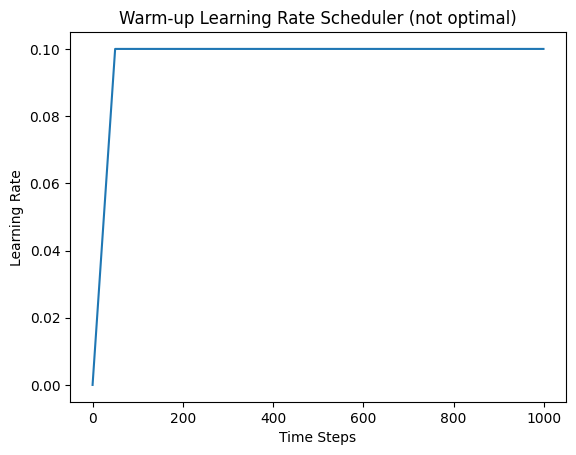

In [264]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(time_steps), lrs)
plt.xlabel('Time Steps')
plt.ylabel('Learning Rate')
plt.title('Warm-up Learning Rate Scheduler (not optimal)')
plt.show()

Now, let's add the cosine annealing to the simple warmup scheduler.

In [265]:
def lr_scheduler(t, alpha_max, alpha_min, tw, tc):
    # t - time step
    # alpha_max - max learning rate
    # alpha min - min learning rate
    # tw - warmup iterations
    # tc - number of cosine annealing iterations
    if t < tw:
        lr = (t / tw) * alpha_max
    elif tw <= t < tc:
        lr = alpha_min + 0.5 * (1 + math.cos(math.pi * (t - tw) / (tc - tw))) * (alpha_max - alpha_min)
    else:
        lr = alpha_min
    return lr

time_steps = 1000
lrs = [lr_scheduler(t, 0.1, 0.0001, 50, 750) for t in range(0, time_steps)]

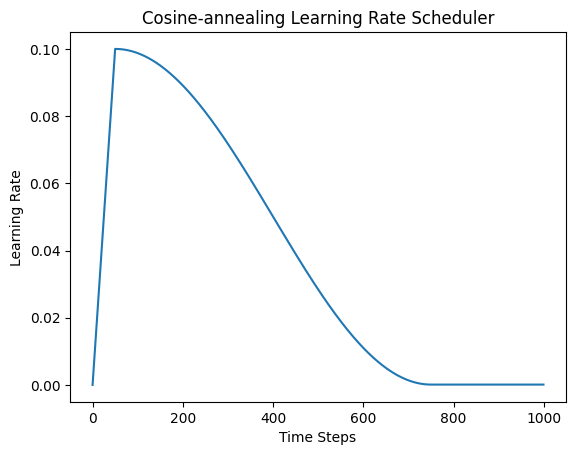

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(time_steps), lrs)
plt.xlabel('Time Steps')
plt.ylabel('Learning Rate')
plt.title('Cosine-annealing Learning Rate Scheduler')
plt.show()

## Exercise 24: Gradient clipping

In [317]:
def gradient_clipping(grads, M, eps=1e-6):
    # g - gradient parameters
    # M - max norm
    for g in grads:
        norm = torch.norm(g)
        if norm < M:
            continue
        else:
            g.mul_(M / (norm + eps))
    return grads

torch.manual_seed(42)
tensors = [torch.nn.Parameter(torch.randn(4, 5), requires_grad=True) for _ in range(5)]

# gradient_clipping(g, 0.01) # TODO

## Exercise 25: Problem (data_loading): Implement data loading (2 points)